### Introduction

Mike Lynch - eResearch Support Analyst, Information Technology Division, University of Technology Sydney

Michael.Lynch@uts.edu.au

In this workshop, I'll be demonstrating some text mining techniques using Google Colab, Python and NLTK, the Python Natural Language Toolkit

### Tools and access

For this workshop, I'll be using Google Colab, which is Google's implementation of a platform called [Jupyter.](https://jupyter.org/) Jupyter allows code and documentation to be shared over the web: I'll share my screen so that you can see my view of the notebook.

I'm not sure what level of familiarity or proficiency we're all at, so this has been designed as a gentle introduction. If you're familiar with this technology, I might be going over things you've already learned.

A Colab notebook has two kinds of content. Text blocks, like this one, are static: they are part of the instructions or context.

The other kind of content is code. These are small snippets of actual Python code, which you can run. The next paragraph is a code snippet which joins together the two words "Text" and "mining":

In [1]:
word1 = "Text"
word2 = "mining"

phrase = word1 + " " + word2
phrase

'Text mining'

The code for a Jupyter notebook runs somewhere on the internet - in this case, on Google's cloud. It's also possible to run a Jupyter notebook locally, so that the computer running it is your own desktop or notepad.

And there are other options for using Jupyter. AARNET provide a Jupyter hosting service called [SWAN](https://support.aarnet.edu.au/hc/en-us/articles/360000575395-What-is-CloudStor-SWAN-) which is available if you have an AAF login.

You can join in this workshop in two ways. If you have a Google account, you can run the code in the notebook by following the link which I've posted in the chat.

If you don't have a Google account, you can still follow the link, but it won't let you actually run any of the code. I'll keep sharing my screen so that you can follow along.

### NLTK - the Natural Language Toolkit

[NLTK](https://www.nltk.org/) is a platform for building Python programs to analyse natural language data. It's independent of Google Colab or Jupyter, so it can be used in stand-alone Python scripts.

It's more of a toolshop than a toolkit. In programming jargon, things like NLTK are called "libraries": a package of code for doing something specialised which your program can use. NLTK is more like a collection of libraries, each of which does a specific linguistic or text-analytical job.

NLTK also provides access to a large collection of [corpora](https://www.nltk.org/nltk_data/), or reference datasets. Many of NLTK's libraries require a corpus to function, and the datasets themselves can be quite big. So, in general, you only install the ones you need.

Because we're running this in Google's cloud, the corpora we use will be stored on temporary storage there.  If you were running an NLTK program locally, they'd be stored in your home directory.

## Fetching data

For this workshop, I've provided sample files on some URLs, whiche we can read into the notebook using the requests library.  The following code imports the requests library, fetches a document and stores it in a variable called 'sample_text'.

If the last line of a code block is something with a value, the notebook will print out that value when the code has finished running. This is a useful way to check if the code block has done what we want it to. In this code block, I've put the notation '[:50]' after the sample_text variable. This is Python syntax for 'give me the first 50 characters' - it's more convenient than dumping the entire file into the browser.

In [2]:
import requests

link = "https://etc.mikelynch.org/tmfh/adaessa-plain.txt"

r = requests.get(link)
sample_text = r.text

sample_text[:50]


' \n \n\t \n\t\t \n\t\t\t Australian Essays \n\t\t\t \n\t\t \n\t\t  Fra'

The following code allows you to mount a file in your Google Drive to the notebook: the file should be in the top level of your Google Drive and you should change 'sample_text.txt' to your filename.

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
filename = "/content/drive/My Drive/sample_text.txt"

with open(filename, 'r') as fh:
  sample_text = fh.read()

sample_text[:50]

The document is the full text of *Australian Essays* by Francis W. L. Adams, published in 1886, which I've downloaded from the [AustLit](https://www.ausnc.org.au/corpora/austlit) corpus of out-of-copyright literature.

There are several other ways to get data into a Google Colab notebook, which we don't have time for tonight. A notebook can ask for access to your Google Drive, or a few lines of code will create a file upload widget in the notebook itself.

It's important to remember that the data is stored in Google's cloud, which means it shouldn't be used for sensitive data or data which needs to be hosted in Australia.

AANet's SWAN notebook allows you to load files from your CloudStor+ storage, which is also available to anyone with an AAF login.

## Tokenising

Tokenising is dividing a text into words or sentences. The simplest way of tokenising in Python is using the built-in function **split**, which breaks up a text on a character of your choice. But **split** hasn't got any linguistic smarts - if we run it on the sample, we find lots of 'words' with all of these backslash-codes - these are tabs and newlines.



In [3]:
sample_text.split(" ")[:20]

['',
 '\n',
 '\n\t',
 '\n\t\t',
 '\n\t\t\t',
 'Australian',
 'Essays',
 '\n\t\t\t',
 '\n\t\t',
 '\n\t\t',
 '',
 'Francis',
 'W.',
 'L.',
 'Adams',
 '',
 '\n\t\t',
 '\n\t\t\t',
 'Melbourne',
 '\n\t\t\t']

NLTK provides functions which can tokenise a text into words or sentences. 

Because NLTK isn't just one thing - it's a whole family of libraries - we have to import the word_tokenize method as well as the top-level library

In [4]:
import nltk
from nltk.tokenize import word_tokenize

If we try to just use the method now, we'll get an error, because the module needs to download a reference dataset to work with. This is a set of rules which tell the tokenizer about how English punctuation works. Unfortunately the database doesn't have a straightforward name like "tokenize" - it's called "punkt".

Fortunately, if an NLTK library needs a corpus, the error message will usually tell you the corpus's name, as you can see when we try to run the tokenizer without it.

One of the things which can make coding daunting is the tendency of programming languages to be very verbose when they hit an error. This can give the impression that something's blown up, and it's not easy to extract the useful information.

In [5]:
sample_tokens = word_tokenize(sample_text)

LookupError: ignored

Fortunately, we don't have to give NLTK a URL or anything - it knows where to download the data from. 

If we were running Python on a laptop, this would download it to our disk, and we'd only have to run it once. Since this is a Colab notebook, it's downloading it into some temporary storage in the Google cloud somewhere, and it won't persist if you come back to the notebook.

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

With the punkt corpus installed, we can try to tokenise the text again.

In [7]:
sample_words = word_tokenize(sample_text)
sample_words[:20]

['Australian',
 'Essays',
 'Francis',
 'W.',
 'L.',
 'Adams',
 'Melbourne',
 'William',
 'Inglis',
 '&',
 'amp',
 ';',
 'Co.',
 '1886',
 'To',
 'Matthew',
 'Arnold',
 'in',
 'England',
 '.']

The nltk.tokenize module also provides a sentence tokenizer, which has enough linguistical awareness to know that, for example, the full stops after the initials in "Francis W. L. Adams" do not mark the ends of a sentence:

In [8]:
from nltk.tokenize import sent_tokenize

sents = sent_tokenize(sample_text)
sents[:10]

[' \n \n\t \n\t\t \n\t\t\t Australian Essays \n\t\t\t \n\t\t \n\t\t  Francis W. L. Adams  \n\t\t \n\t\t\t Melbourne \n\t\t\t William Inglis &amp; Co. \n\t\t\t 1886 \n\t\t \n\t\t \n\n\t\t \n\n\t \n\n  To Matthew Arnold in England.',
 '&#8216; Master, with this I send you, as a boy  \n  that watches from below some cross-bow bird  \n  swoop on his quarry carried up aloft,  \n  and cries a cry of victory to his flight  \n  with sheer joy of achievement&#8212;So to you  \n  I send my voice across the sundering sea,  \n  weak, lost within the winds and surfy waves,  \n  but with all glad acknowledgment fulfilled  \n  and honour to you and to sovran Truth!',
 '&#8217;  \n  January, 1886 .',
 'Contents.',
 'PAGE.',
 'PREFACE \n ix.',
 'MELBOURNE AND HER CIVILIZATION \n I \n \n \n THE POETRY OF ADAM LINDSAY GORDON \n II \n \n \n THE SALVATION ARMY \n 27 \n \n \n SYDNEY AND HER CIVILIZATION \n 50 \n \n \n CULTURE \n 73 \n \n \n &#8220;DAWNWARDS,&#8221; A DIALOGUE \n \n \n \n INTRODUCTION \n 90 

These are two of the simplest tokenizers available in NLTK: there are many more, based on different natural languages, tokenisation strategies, and corpus types. For example, there's a tokenizer specifically designed for Twitter.

## Finding collocations

Collocations are words which occur next to or near one another. The NLTK collocations library provides interfaces which allow us to find bigrams (pairs of collocated words), as well as trigrams and quadgrams.

The following code uses a BigramCollocationFinder to analyse the Australian Essays, and then ranks the collocations using a specific measure algorithm called PMI.

One of the strengths of NLTK is that it has a lot of computational linguistic research and wisdom baked into it. One of the weaknesses, if you're not a computational linguist, is that the way it's referred to in the code and in documentation is very jargon-heavy. PMI stands for "pointwise mutual information" and is one of a set of different algorithms for correlating bigrams.

In [9]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(sample_words)

finder.nbest(bigram_measures.pmi, 10)

[("'Twere", 'hazardous'),
 ('27', 'SYDNEY'),
 ('50', 'CULTURE'),
 ('859', 'corps'),
 ('ADAM', 'LINDSAY'),
 ('ARMY', '27'),
 ('Alphonse', 'Daudet'),
 ('Ave', 'atque'),
 ('Bethlehem', 'manger'),
 ('Brass', 'bands')]

We can apply a frequency filter so that we ignore bigrams which are strongly correlated, but which only occur once or twice.

In [10]:
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)

[('A.', 'N.'),
 ('foster', 'poetic'),
 ('Henry', 'Parkes'),
 ('Ten', 'Thousand'),
 ('Adam', 'Lindsay'),
 ('Herbert', 'Spencer'),
 ('Morning', 'Herald'),
 ('six-toed', 'giant'),
 ('poke', 'fun'),
 ('et', 'cetera')]

I wondered about the phrase "six-toed giant" and did some investigation, and found that it belongs to the English critic Matthew Arnold, who was the first to use the word "philistine" in its pejorative sense of a person with a disdain for or ignorance of culture: Adams dedicated his book to Arnold and uses the phrase repeatedly:

> Everywhere are the thumb marks and the great toe marks of the six-fingered six-toed giant, Mr. Arnold's life-long foe, the British Philistine!

This is an interesting example of how a data analysis can lead one to notice a correlation which has cultural meaning.

The collocation finder can be given a larger window, so that it looks for pairs of words which are near one another.

In [11]:
finder = BigramCollocationFinder.from_words(sample_words, 15)
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi,10)

[('339', 'sar'),
 ('enormously', 'increased'),
 ('enormously', 'wool-production'),
 ('increased', 'wool-production'),
 ('tam', 'quam'),
 ('disinterestedness', 'endeavour'),
 ('melodies', 'beauties'),
 ('peasants', 'landlords'),
 ('predilections', 'gratified'),
 ('side-waters', 'back-waters')]

## Parts of speech

NLTK has many different ways of parsing sentences and tagging them by their grammatical function. This isn't always a straighforward task, computationally, as natural language is ambiguous, and what part of speech a word is depends on context.

We're going to use the Perceptron tagger to extract a list of nouns from our sample text, and then visualise the top twenty nouns.

This part of the workshop was based on section 13 of Alex, Beatrice and Llewellyn, Clare. (2020) Library Carpentry: Text & Data Mining. Centre for Data, Culture & Society, University of Edinburgh. http://librarycarpentry.org/lc-tdm/

To begin with, we need to download the Perceptron tagger's training data, and import the pos_tag function.

In [12]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**pos_tag** takes a list of words, which we've already created, and returns a list of the same words, tagged with a two- or three-letter code indicating the part of speech. We're looking for nouns, which will be tagged with NN (singular or mass nouns) or NNS (plural nouns).

(The tags emitted by Perceptron are not always obvious to a non-linguist. They come from the [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) dataset: a treebank is a large corpus of existing texts which have been parsed into trees  and marked with POS tags. Penn was one of the first, and part of it was used to train the Perceptron algorithm.)

In [13]:
tagged_words = pos_tag(sample_words)
tagged_words[:20]

[('Australian', 'JJ'),
 ('Essays', 'NNP'),
 ('Francis', 'NNP'),
 ('W.', 'NNP'),
 ('L.', 'NNP'),
 ('Adams', 'NNP'),
 ('Melbourne', 'NNP'),
 ('William', 'NNP'),
 ('Inglis', 'NNP'),
 ('&', 'CC'),
 ('amp', 'NN'),
 (';', ':'),
 ('Co.', 'NNP'),
 ('1886', 'CD'),
 ('To', 'TO'),
 ('Matthew', 'NNP'),
 ('Arnold', 'NNP'),
 ('in', 'IN'),
 ('England', 'NNP'),
 ('.', '.')]

The following syntax filters the list of (word, pos) in the above if pos matches either NN or NNS:

In [14]:
sample_nouns = [ word for (word, pos) in tagged_words if (pos == 'NN' or pos == 'NNS')]
sample_nouns[:20]

['amp',
 'boy',
 'bird',
 'swoop',
 'quarry',
 'cry',
 'victory',
 'flight',
 'sheer',
 'joy',
 'achievement',
 'voice',
 'sea',
 'winds',
 'surfy',
 'waves',
 'acknowledgment',
 'Contents',
 'ix',
 'Preface']

Now that we've collected all of the nouns, we can calculate a frequency distribution. The NLTK FreqDist class has a built-in method to plot the top n terms, which Colab can display as an in-line chart:

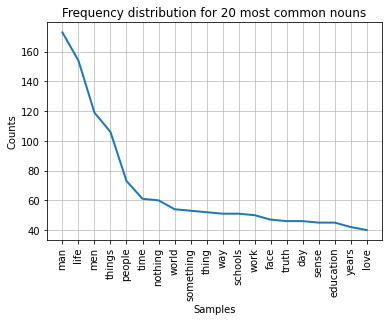

In [15]:
freq_dist = nltk.FreqDist(sample_nouns)
freq_dist.plot(20, title="Frequency distribution for 20 most common nouns")

We can also use the Python libraries wordcloud and matplotlib to generate a word cloud based on the frequency distribution

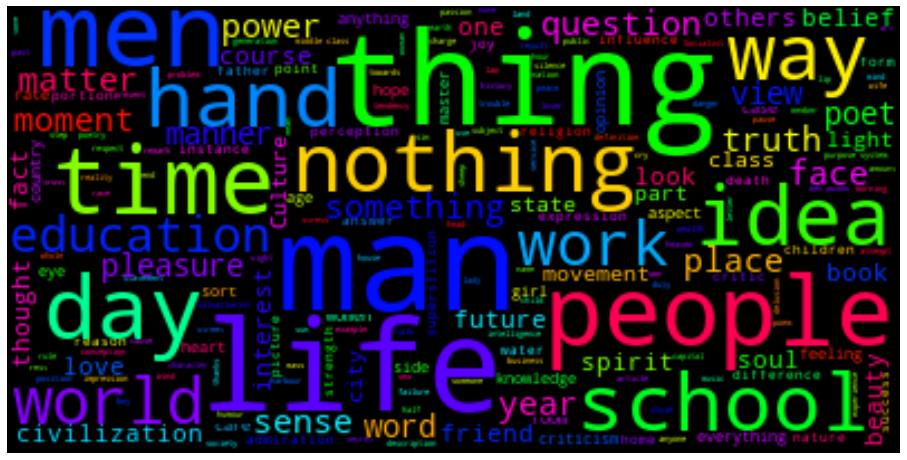

In [16]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=60, colormap='hsv').generate(' '.join(sample_nouns))
plt.rcParams['figure.figsize'] = (16, 12)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Classifying text

In this section, we'll use a simple form of supervised machine learning to try to sort text documents into categories.

The documents we're using are lists of criminal convictions for women convicts in the 19th and early 20th centuries, from Dr Alana Piper's [Criminal Characters](https://criminalcharacters.com/) research project.

We're going to try to train a Bayesian classifier to sort these convictions into different categories. Bayesian classifiers are a fairly old machine learning techique - they are not as cool as neural networks, but they're not as expensive in terms of computational power, and they're easier to interrogate - they aren't black boxes.

First, we need to load the data set from another URL.

In [17]:
r = requests.get("https://etc.mikelynch.org/tmfh/cc/convictions.txt")
corpus = r.text
convictions = corpus.splitlines()
convictions[:10]

['5-NOV-1914 PROVIS, EMILY LOUISA:  Â£1 FINE OR 14 DAYS IMP DRUNK AND DISORDERLY CASTLEMAINE PETTY SESSIONS',
 '18-JAN-1876 WILSON, ANNIE: 6 MONTHS IMP VAGRANCY MELBOURNE PETTY SESSIONS',
 '08-NOV-1875 DEMPSEY, ELIZABETH: 3 MONTHS HL VAGRANCY SANDRIDGE PETTY SESSIONS',
 '16-SEP-1907 CROZIER, ETHEL:  Â£1013/- OR 3 MONTHS IMP CONCURRENT DAMAGING PROPERTY NORTH MELBOURNE PETTY SESSIONS',
 '14-FEB-1867 WOODS, MARY A F: 12 MONTHS IMPRISONMENT VIOLENT ASSAULT SANDHURST GENERAL SESSIONS',
 '15-AUG-1907 DONOVAN, ELLEN:  FINE OR 3 DAYS DRUNKENNESS UNKNOWN',
 '07-OCT-1878 CAMPBELL, MARY: 3 MONTHS IMP VAGRANCY MELBOURNE PETTY SESSIONS',
 '15-JUL-1875 CHARLESWORTH, SOPHIA: BOUND IN SUREITIES OF 15 POUNDS TO KEEP THE PEACE FOR 6 MONTHS THREATENING LANGUAGE WARRNAMBOOL PETTY SESSIONS',
 '04-MAR-1909 JENSEN, AGNES:  6 MONTHS IMP INSUFFICIENT MEANS OF SUPPORT BALLARAT EAST PETTY SESSIONS',
 '19-JUN-1876 LAWRENCE, LOUISA: 3 MONTHS HL VAGRANCY MELBOURNE PETTY SESSIONS']

NLTK's Bayesian classifier requires us to provide a Python function which can take a document - in this case, each conviction is a document - and turn it into a set of 'features' - a feature is, roughly, a yes/no statement about the document.

For our features, we'll use the presence or not of the top 100 words in the entire corpus. The nltk class FreqDist will count all of the tokenised words, and then we have a line of Python which extracts the top 100 by frequency.

In [18]:
all_words = nltk.FreqDist(word_tokenize(corpus))
top_words = sorted(all_words.keys(), key=lambda x: all_words[x], reverse=True)[:100]
top_words[:10]

[':', ',', 'SESSIONS', 'PETTY', 'MONTHS', 'MELBOURNE', 'HL', 'IMP', '6', '3']

We now need to define a function which will take as its input a conviction, and return a Python data structure which can be used as a feature set for the classifier.

In [19]:
def conviction_features(c):
	c_words = set(word_tokenize(c))
	features = {}
	for word in top_words:
		features['contains({})'.format(word)] = ( word in c_words )
	return features

Now that we've defined our function, we can see how it works on a sample conviction:

In [20]:
conviction_features('03-MAY-1875 ABBOT, NORAH: 3 MONTHS IMP VAGRANCY MARYBOROUGH PETTY SESSIONS')

{'contains(&)': False,
 'contains(,)': True,
 'contains(1)': False,
 'contains(12)': False,
 'contains(14)': False,
 'contains(2)': False,
 'contains(3)': True,
 'contains(40/-)': False,
 'contains(6)': False,
 'contains(7)': False,
 'contains(9)': False,
 'contains(:)': True,
 'contains(A)': False,
 'contains(ADAMS)': False,
 'contains(AGNES)': False,
 'contains(ALICE)': False,
 'contains(AND)': False,
 'contains(ANN)': False,
 'contains(ANNE)': False,
 'contains(ANNIE)': False,
 'contains(ASSAULT)': False,
 'contains(BAIL)': False,
 'contains(BALLARAT)': False,
 'contains(BEHAVIOUR)': False,
 'contains(CARLTON)': False,
 'contains(CATHERINE)': False,
 'contains(CECELIA)': False,
 'contains(COLLINGWOOD)': False,
 'contains(COURT)': False,
 'contains(DALEY)': False,
 'contains(DALLIMORE)': False,
 'contains(DAYS)': False,
 'contains(DEFAULT)': False,
 'contains(DISORDERLY)': False,
 'contains(DRUNK)': False,
 'contains(DRUNKARD)': False,
 'contains(DRUNKENNESS)': False,
 'contains(DWEL

A Bayesian classifier has to be trained: we have to give it a sample of documents which have been classified by a human who knows how to categorise them. The training process involves generating feature sets for each document, and correlating it with the categorisation.

Classifying the training dataset is a boring manual process, so I won't do it here. The training data is a CSV file witn 200 convictions, classified into three categories:

* property
* violent
* nonviolent

We load this training dataset from another URL. This code block looks a little different because it's using the Python csv library to parse the document into rows. 

We use the rows to build a list of feature sets with classifications:

In [21]:
import csv

training_data = []

with requests.get("https://etc.mikelynch.org/tmfh/cc/training.csv", stream=True) as r:
  lines = (line.decode('utf-8-sig') for line in r.iter_lines())
  for row in csv.reader(lines):
    features = conviction_features(row[0])
    label = row[1]
    training_data.append((features, label))


 

So that we can get a sense of how accurate the classifier is, we divide the training data into two sets. The first 100 rows will be used to train the classifier, and the second 100 will be used to check its accuracy. It's important to use a different set of pre-classified data for the accuracy check, as we want to know how good the classifier is at categorising convictions which it hasn't been trained on.

The second line here uses a slightly different Python syntax for getting part of a list. '[100:]' asks for every item from 100 onwards.

In [22]:
checking_data = training_data[:100]
training_data = training_data[100:]

We can now create a NaiveBayesClassifier and train it. (It's called a "naive" classifier because it is built on the assumption that none of the features correlate with any of the others.)

After training it, we can call a function called "show_most_informative_features" - this reports on which features were the most strongly correlated with any of the labels.

For example, if the conviction contains the word "THREATENING", this tips the balance between violent and nonviolent by a factor of 8.4 / 1.

In [23]:
classifier = nltk.NaiveBayesClassifier.train(training_data)
classifier.show_most_informative_features(20)

Most Informative Features
       contains(GENERAL) = True           proper : nonvio =     18.9 : 1.0
         contains(PETTY) = False          proper : nonvio =      9.2 : 1.0
        contains(PERSON) = True           proper : nonvio =      8.8 : 1.0
          contains(BAIL) = True           violen : nonvio =      8.4 : 1.0
   contains(THREATENING) = True           violen : nonvio =      8.4 : 1.0
        contains(LOUISA) = True           proper : nonvio =      6.3 : 1.0
       contains(SUPREME) = True           violen : nonvio =      6.0 : 1.0
             contains(2) = True           violen : nonvio =      6.0 : 1.0
      contains(SESSIONS) = False          violen : nonvio =      6.0 : 1.0
       contains(DEFAULT) = True           violen : nonvio =      6.0 : 1.0
         contains(COURT) = True           violen : nonvio =      6.0 : 1.0
            contains(OF) = True           violen : nonvio =      6.0 : 1.0
      contains(BALLARAT) = True           violen : nonvio =      6.0 : 1.0

Now that we've trained our classifier, we can test its accuracy, by running it on the second set of data which I classified by hand and checking the results.



In [24]:
count = 0

for features, label in checking_data:
  bayes_result = classifier.classify(features)
  if bayes_result == label:
    count += 1

accuracy = count / len(checking_data)
accuracy 

0.85

The classifier agrees with the manual labels I've given the checking data 85% of the time. This is ok for such a small training set, but not accurate enough to be useful. We could improve things by increasing the size of the training dataset, and by refining the function we used to extract features from the convictions.

For example, if we look at the most informative features list, quite a few of these are women's names, which we could try filtering out, on the assumption that they're not really relevant to the nature of a conviction.

Training a classifier is the sort of work which benefits from an exploratory approach, and the accuracy testing is important in order to be able to tell if your approach is improving.

We can see the sorts of errors the classifier is making if we run it over a few convictions from the original text file.

Note that before we classify a conviction, we first have to pass it through our **conviction_features** function to change it from a line of text to a feature set.

This seems a bit convoluted, but it gives a lot of flexibility: we could defined features based on any properties of a text which are salient, not just the occurrence of words.

In [25]:
for conv in convictions[:10]:
	label = classifier.classify(conviction_features(conv))
	print(conv)
	print(label)


5-NOV-1914 PROVIS, EMILY LOUISA:  Â£1 FINE OR 14 DAYS IMP DRUNK AND DISORDERLY CASTLEMAINE PETTY SESSIONS
nonviolent
18-JAN-1876 WILSON, ANNIE: 6 MONTHS IMP VAGRANCY MELBOURNE PETTY SESSIONS
nonviolent
08-NOV-1875 DEMPSEY, ELIZABETH: 3 MONTHS HL VAGRANCY SANDRIDGE PETTY SESSIONS
nonviolent
16-SEP-1907 CROZIER, ETHEL:  Â£1013/- OR 3 MONTHS IMP CONCURRENT DAMAGING PROPERTY NORTH MELBOURNE PETTY SESSIONS
nonviolent
14-FEB-1867 WOODS, MARY A F: 12 MONTHS IMPRISONMENT VIOLENT ASSAULT SANDHURST GENERAL SESSIONS
property
15-AUG-1907 DONOVAN, ELLEN:  FINE OR 3 DAYS DRUNKENNESS UNKNOWN
nonviolent
07-OCT-1878 CAMPBELL, MARY: 3 MONTHS IMP VAGRANCY MELBOURNE PETTY SESSIONS
nonviolent
15-JUL-1875 CHARLESWORTH, SOPHIA: BOUND IN SUREITIES OF 15 POUNDS TO KEEP THE PEACE FOR 6 MONTHS THREATENING LANGUAGE WARRNAMBOOL PETTY SESSIONS
violent
04-MAR-1909 JENSEN, AGNES:  6 MONTHS IMP INSUFFICIENT MEANS OF SUPPORT BALLARAT EAST PETTY SESSIONS
nonviolent
19-JUN-1876 LAWRENCE, LOUISA: 3 MONTHS HL VAGRANCY MELB

Finally, even though we know that our classifier isn't 100% accurate, we can run it over the entire corpus and get a breakdown of how many convictions fell into each category

In [26]:
breakdown = {}

for conv in convictions:
  label = classifier.classify(conviction_features(conv))
  if label not in breakdown:
    breakdown[label] = [ conv ]
  else:
    breakdown[label].append(conv)


for label, convs in breakdown.items():
  print(label, len(convs))
  print("\n".join(convs[:10]))
  print("\n")



nonviolent 2466
5-NOV-1914 PROVIS, EMILY LOUISA:  Â£1 FINE OR 14 DAYS IMP DRUNK AND DISORDERLY CASTLEMAINE PETTY SESSIONS
18-JAN-1876 WILSON, ANNIE: 6 MONTHS IMP VAGRANCY MELBOURNE PETTY SESSIONS
08-NOV-1875 DEMPSEY, ELIZABETH: 3 MONTHS HL VAGRANCY SANDRIDGE PETTY SESSIONS
16-SEP-1907 CROZIER, ETHEL:  Â£1013/- OR 3 MONTHS IMP CONCURRENT DAMAGING PROPERTY NORTH MELBOURNE PETTY SESSIONS
15-AUG-1907 DONOVAN, ELLEN:  FINE OR 3 DAYS DRUNKENNESS UNKNOWN
07-OCT-1878 CAMPBELL, MARY: 3 MONTHS IMP VAGRANCY MELBOURNE PETTY SESSIONS
04-MAR-1909 JENSEN, AGNES:  6 MONTHS IMP INSUFFICIENT MEANS OF SUPPORT BALLARAT EAST PETTY SESSIONS
19-JUN-1876 LAWRENCE, LOUISA: 3 MONTHS HL VAGRANCY MELBOURNE PETTY SESSIONS
27-JAN-1874 GORMAN, CATHERINE: 3 MONTHS IMP DAMAGING PROPERTY MELBOURNE PETTY SESSIONS
9-FEB-1905 MORNINGTON, ALICE: 3 MONTHS VAGRANCY NORTH MELBOURNE PETTY SESSIONS


property 660
14-FEB-1867 WOODS, MARY A F: 12 MONTHS IMPRISONMENT VIOLENT ASSAULT SANDHURST GENERAL SESSIONS
01-DEC-1911 COSTELLOE

## Thank you

[Google Colab](https://colab.research.google.com/)

[AARNet's CloudStor SWAN](https://support.aarnet.edu.au/hc/en-us/sections/360000129695-CloudStor-SWAN)

[Natural Language Processing with Python - Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book/) - Steven Bird, Ewan Klein and Edward Loper

Alex, Beatrice and Llewellyn, Clare. (2020) [Library Carpentry: Text & Data Mining.](http://librarycarpentry.org/lc-tdm/) Centre for Data, Culture & Society, University of Edinburgh

[UTS eResearch drop-in sessions - Thursday 3-4PM on Zoom](https://utsmeet.zoom.us/my/hackyhour)